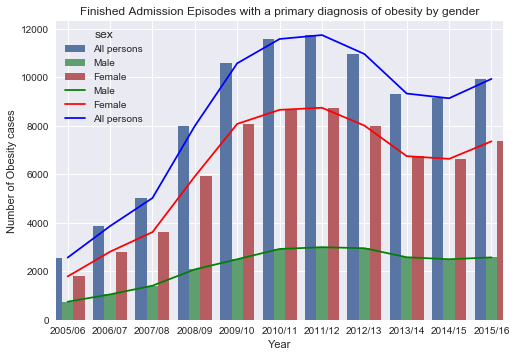

The trend suggest that the number of male obesity cases seem to
observe an approximately constant trend
while the obesity cases among the female cases saw a non-monotonic behaviour.


In [1]:
import matplotlib.pyplot as plt
import types
import numpy as np
import sklearn
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import norm
from __future__ import division
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier



### Author C. Joshi
### The dataset has been obtained from
##https://data.gov.uk/dataset/statistics_on_obesity_physical_activity_and_diet_england

### What this dataset is about ?
#### This statistical report presents a range of information on obesity, physical activity 
#and diet, drawn together from a variety of sources.

#The topics covered include:

#Overweight and obesity prevalence among adults and children

#Physical activity levels among adults and children

#Trends in purchases and consumption of food and drink and energy intake

#Health outcomes of being overweight or obese.

#The annual compendium report presents new analyses by NHS Digital which 
#consists of statistics on the number of NHS hospital admissions attributable
#to obesity, the number of NHS hospital admissions attributable to a procedure 
#of 'Bariatric Surgery', and the number of prescription items provided in primary
#care for the treatment of obesity. The report focuses on England. 
#The latest available hospital admissions data is for 2015/16. The latest available 
#prescribing data is for 2016.


### STEP ONE :READING THE DATASET 
space=100
workbook=pd.ExcelFile('obes-phys-acti-diet-eng-2017-tab.xlsx')
list_sheets=workbook.sheet_names
df1 = pd.read_excel('obes-phys-acti-diet-eng-2017-tab.xlsx',\
sheetname=list_sheets[1])
df1_clean=df1[df1['Unnamed: 2'].apply(lambda x: type(x)==int)]
df1_clean=df1_clean.dropna(axis=1, how='all')
df1_clean.index=np.arange(np.shape(df1_clean)[0])
df1_clean.columns=['Year','All persons','Male','Female']
#df1_clean.index=df1_clean['Year']
#del df1_clean['Year']
#print df1_clean
df1_clean_rs = pd.melt(df1_clean.loc[:,['Year','All persons','Male','Female']], id_vars="Year", var_name="sex", \
                    value_name="Number of Obesity cases")
#print df1_clean
fig, ax = plt.subplots()
sns.set()
sns.barplot(x='Year', y='Number of Obesity cases', hue='sex', data=df1_clean_rs)
df1_clean.plot(x='Year',y='Male',color='green',ax=ax)
df1_clean.plot(x='Year',y='Female',color='red',ax=ax)
df1_clean.plot(x='Year',y='All persons',color='blue',ax=ax)
plt.xlabel("Year")
plt.ylabel("Number of Obesity cases")
plt.title("Finished Admission Episodes with a primary diagnosis of obesity by gender")
plt.show()
print "The trend suggest that the number of male obesity cases seem to"
print "observe an approximately constant trend"
print "while the obesity cases among the female cases \
saw a non-monotonic behaviour."


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
FITTING PROECDURE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


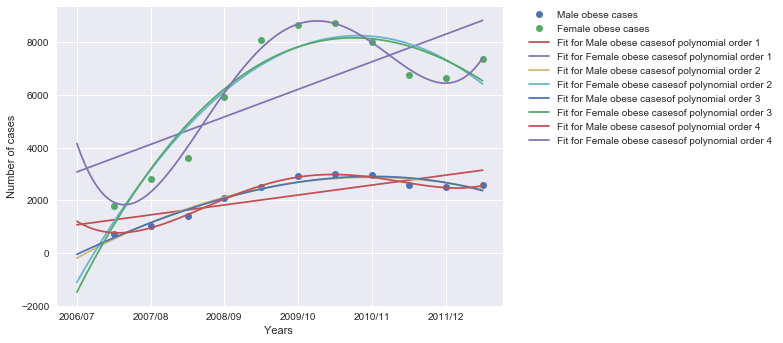

As evident in the plots, there is a time window between 
mid 2007 and until 2010, where the obesity trend shows is highly nonlinear
This could be due to various factors, including drop in the prices of energy drinks or other
 unhealthy food items, change in government policies etc. to name a few
We will explore this trend in bit more detail


In [3]:
print "+"*space
print "FITTING PROECDURE"
print "+"*space
split_size=0.3


df1_clean['dummy_year']=1+np.arange(len(df1_clean['Year']))
grpedyear=zip(df1_clean['dummy_year'].tolist(),df1_clean['Year'].tolist())
X_train,X_test,y_train,y_test = train_test_split(df1_clean.loc[:,['dummy_year','Year']],\
df1_clean['Male'][:,np.newaxis],test_size=split_size)





fet_lst=['Male','Female']
poly_ord=[1,2,3,4]
pntsmax=100
strdata=[]
strpolydata=[]
streqn=[]
for out_indx in range(len(fet_lst)):
    for in_indx in range(len(poly_ord)):
        x = np.array(df1_clean['dummy_year'])
        strx=list(x)
        data=np.array(df1_clean[fet_lst[out_indx]])
        strdata.append(list(data))
        poly_params = np.polyfit(x, data, poly_ord[in_indx]) # Fit the data with a nth degree polynomial
        poly_ft = np.poly1d(poly_params)      # Construct the polynomial
        streqn.append(list(poly_ft.c))
        xPoly = np.linspace(0, max(x), pntsmax)  # Generate 100 x-coordinates from 0 to max(x)
        strpolyx=list(xPoly)
        strpolydata.append(list(poly_ft(xPoly)))  # Use the polynomial to calculate the y-coordinates
#strx=np.reshape(strx,(len(fet_lst)*len(poly_ord),len(df1_clean['dummy_year'])))
strdata=np.reshape(strdata,(len(fet_lst)*len(poly_ord),len(df1_clean['dummy_year'])))
#strpolyx=np.reshape(strpolyx,(len(fet_lst)*len(poly_ord),len(xPoly)))
strpolydata=np.reshape(strpolydata,(len(fet_lst)*len(poly_ord),len(xPoly)))
streqn=np.reshape(streqn, (len(fet_lst),len(poly_ord)))

poly_ord=poly_ord*(len(fet_lst))

f, ax = plt.subplots(1, 1)
sns.set()
fet=0
ax.plot(strx, strdata[fet,:], 'o',label=str(fet_lst[0])+" obese cases")
ax.plot(strx, strdata[fet+int((np.shape(strpolydata)[0])/len(fet_lst)),:], 'o',label=str(fet_lst[1])+" obese cases")
for index in range(int((np.shape(strpolydata)[0])/len(fet_lst))):
    ax.plot(strpolyx, strpolydata[index,:],label="Fit for "+str(fet_lst[0])+" obese cases"+"of polynomial order "+str(poly_ord[index]))
    skip_index=index+int((np.shape(strpolydata)[0])/len(fet_lst))
    ax.plot(strpolyx, strpolydata[skip_index,:],label="Fit for "+str(fet_lst[1])+" obese cases"+"of polynomial order "+str(poly_ord[skip_index]))

ax.set_xticklabels(df1_clean.Year)
plt.xlabel("Years ")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend()
plt.show()

print "As evident in the plots, there is a time window between "
print "mid 2007 and until 2010, where the obesity trend shows is highly nonlinear"
print "This could be due to various factors, including drop in the prices of energy drinks or other"
print " unhealthy food items, change in government policies etc. to name a few"
print "We will explore this trend in bit more detail"

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
In this section we will perform Linear Regression to train and test
the available data. We have now added more details to the dataset
by adding more information on the obseity trend by further splitting
the data into various age groups
WE WILL NOW ANALYSE THE OBESITY VARIATION IN DIFFERENT AGE GROUPS OVER TIME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
POLYNOMIAL REGRESSION OF ORDER 2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Variance score for Under-16 is:-3.181018
Mean squared error for Under-16 is:30449.078750
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Variance score for 16-24 is:0.818518
Mean squared error for 1

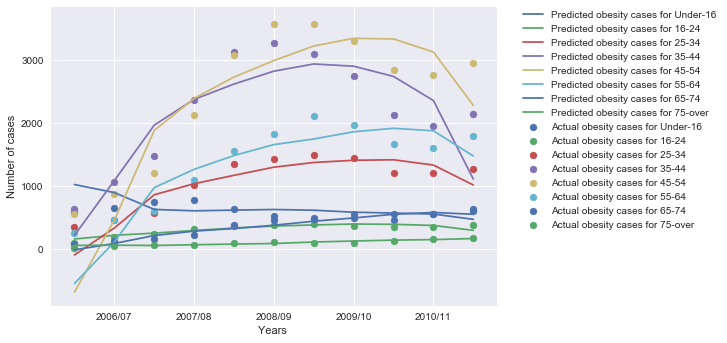

In [6]:
print "+"*space
print "In this section we will perform Linear Regression to train and test"
print "the available data. We have now added more details to the dataset"
print "by adding more information on the obseity trend by further splitting"
print "the data into various age groups"
## split_size

### Adding more features to the dataframe:
df2 = pd.read_excel('obes-phys-acti-diet-eng-2017-tab.xlsx',\
sheetname=list_sheets[2])
df2_clean=df2[df2['Unnamed: 2'].apply(lambda x: type(x)==int)]
df2_clean=df2_clean.dropna(axis=1, how='all')
df2_clean.index=np.arange(np.shape(df2_clean)[0])
df2_clean.columns=['Year','All persons','Under-16','16-24',\
                  '25-34','35-44','45-54','55-64','65-74','75-over']
del df2_clean['All persons']
df_1_2_clean= pd.merge(df1_clean, df2_clean, on='Year', how='outer')

print "WE WILL NOW ANALYSE THE OBESITY VARIATION IN DIFFERENT AGE GROUPS OVER TIME"
print "+"*space
age_grp_list=list(df2_clean.columns[2:])



agegrplist=list(df_1_2_clean.columns)[4:]
print '+'*space
str_age_df=pd.DataFrame()
poly_order=2
print "POLYNOMIAL REGRESSION OF ORDER "+str(poly_order)
print '+'*space

poly = PolynomialFeatures(degree=poly_order)
ply_obes_df = poly.fit_transform(df_1_2_clean[agegrplist[0]][:,np.newaxis])
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) \
                                  for pair in tuple if pair[1]!=0]) \
                        for tuple in [zip(agegrplist,p) for p in poly.powers_]]
temp_df = pd.DataFrame(ply_obes_df, columns = target_feature_names)
temp_df.rename(columns={'': 'Coeff'}, inplace=True)
fit_colmnslst=list(temp_df.columns)
str_age_df=pd.merge(df_1_2_clean[list(df_1_2_clean.columns)[0:]], temp_df, left_index=True,right_index=True)



### Polynmoial Regression  
by_age=agegrplist[1:]
f, ax = plt.subplots(1, 1)
sns.set()
for index in range(len(by_age)):
    #poly_X_train,poly_X_test,poly_y_train,poly_y_test \
    #= train_test_split(str_age_df[fit_colmnslst],\
    #str_age_df[by_age[index]][:,np.newaxis],test_size=split_size)
    
    # Create linear regression object
    regr = linear_model.Lasso()
    #regr = linear_model.LinearRegression()

    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    nmax=10
    y=str_age_df[by_age[index]][:,np.newaxis]
    predicted = cross_val_predict(regr,str_age_df[fit_colmnslst], y, cv=nmax)
    scores = cross_val_score(regr,str_age_df[fit_colmnslst], y, cv=nmax)
    def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())
    
    # Make predictions using the testing set
    #poly_y_pred = regr.predict(poly_X_test) 
    print "Variance score for "+str(by_age[index])+" is:%1f"%\
    r2_score(y, predicted)
    print "Mean squared error for "+str(by_age[index])+" is:%1f"%\
    mean_squared_error(y, predicted)
    #print "Cross validation scores :"
    #display_scores(scores)
    print "+"*space
    ax.plot(str_age_df[fit_colmnslst]['dummy_year^1'],predicted,\
            label="Predicted obesity cases for "+str(by_age[index]))
    ax.scatter(str_age_df[fit_colmnslst]['dummy_year^1'],y,
               label="Actual obesity cases for "+str(by_age[index]))
ax.set_xticklabels(df1_clean.Year)
plt.xlabel("Years ")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
    


K means classifier
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


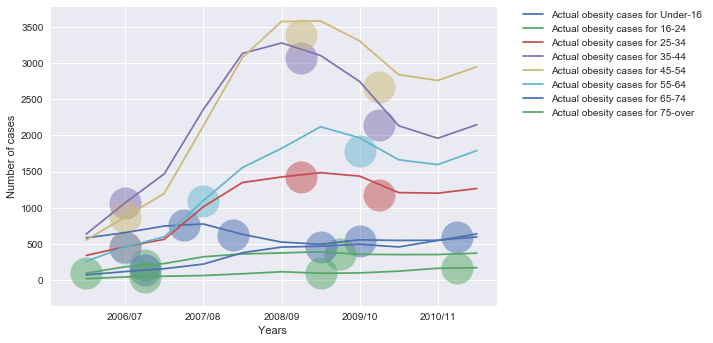

In [7]:
## # K-means Classifier
print "K means classifier"
print "+"*space
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
f, ax = plt.subplots(1, 1)
sns.set()
for index in range(len(by_age)):
    X=np.array(str_age_df.loc[:,['dummy_year^1',by_age[index]]])
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    ax.plot(X[:, 0], X[:, 1],  label="Actual obesity cases for "+str(by_age[index]))
    #ax.scatter(X[:, 0], X[:, 1])
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1] ,s=1000, alpha=0.5)

ax.set_xticklabels(df1_clean.Year)
plt.xlabel("Years ")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()    
plt.show()